# Black Friday Dataset EDA + Feature Engineering #

## Problem Statement: ##

##### A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. #####

##### They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. #####

##### Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products. #####

## 1. Importing The Libraries and datasets. ##

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [60]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [61]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [62]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [64]:
df_train.shape

(550068, 12)

## 2. Appending the test and training data for data preprocessing. ##

In [66]:
df = pd.concat([df_train,df_test])
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
93237,1005735,P00237642,M,26-35,6,C,4+,0,5,14.0,NaN,NaN
140997,1000981,P00115442,M,26-35,20,B,2,1,8,NaN,NaN,NaN
218406,1003688,P00185342,M,18-25,6,B,1,0,3,4.0,NaN,13696.0
44077,1001851,P00233342,M,26-35,19,B,4+,1,1,15.0,16.0,NaN
356841,1001015,P00121342,M,36-45,3,A,4+,1,1,5.0,18.0,19540.0


In [67]:
df.shape

(783667, 12)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


## 3. We observe that User-ID column will not play any role in predicting purchase value, thus we drop User_ID column. ##

In [70]:
df.drop(['User_ID'], axis=1, inplace = True)

In [71]:
df.shape

(783667, 11)

## 4. Target Guiding of Age column ##
- Age is given as a range here, which is a __categorical__ variable in pandas.
- We must fix this __via Target Guiding.__ 

In [73]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [74]:
df['Age'] = df['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

In [75]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,7,16,C,4+,0,8,NaN,NaN,7969.0


## 5. Ordinal Mapping of Gender Column ##
- The Gender column contains one of the __two categories: Male or Female.__
- We can use __ordinal mapping__ to convert it to numerical column.

In [77]:
df['Gender'].value_counts()

Gender
M    590031
F    193636
Name: count, dtype: int64

In [78]:
df['Gender'] = df['Gender'].map({'M':1, 'F':0})

In [79]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


### Fixing categorical City_Category column. ###

In [103]:
df_city = pd.get_dummies(df['City_Category'], drop_first = True, dtype = int)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [105]:
df = pd.concat([df, df_city],axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [107]:
df.drop('City_Category', axis=1, inplace = True)

In [109]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


## 6. Handling Missing Values ##

In [114]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

#### Purchase_Category_1 and Purchase_Category_2 contain a large number of missing values. ####

In [118]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [120]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

#### The values in both these columns are discretely distributed. ####

#### In conditions where the data has a lot of missing values, we replace missing values by the mode of the distribution. ####

In [127]:
mode_2 = df['Product_Category_2'].mode()[0]
mode_2

8.0

In [129]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(mode_2)

In [131]:
df['Product_Category_2'].isnull().sum()

0

In [133]:
mode_3 = df['Product_Category_3'].mode()[0]
mode_3

16.0

In [135]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(mode_3)

In [137]:
df['Product_Category_2'].isnull().sum()

0

In [139]:
df.shape

(783667, 12)

df['Stay_In_Current_City_Years'].unique()

In [143]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+',"")

In [145]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 71.7+ MB


### Converting object into Integers ###

In [150]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [154]:
df['B'] = df['B'].astype(int)
df['c'] = df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
 12  c                           783667 non-null  int32  
dtypes: float64(3), int3

## 7. Visualizing the data ##

<Axes: xlabel='Age', ylabel='Purchase'>

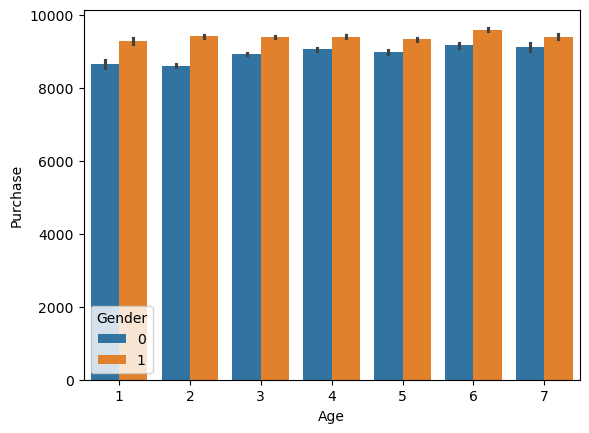

In [161]:
sns.barplot(x='Age', y='Purchase', hue = 'Gender', data=df)

### Observations- ###

#### The Purchase capacity of men and women is almost same. ####

#### However men spend more while purchasing goods. ####

## 8. Visualizing Purchase with Age grouped by Gender ##

<Axes: xlabel='Age', ylabel='Purchase'>

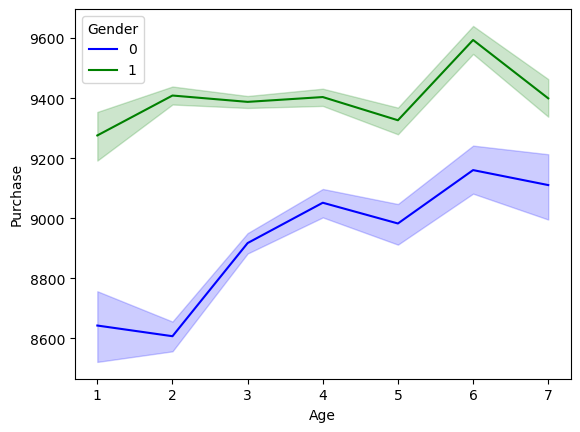

In [175]:
sns.lineplot(x='Age', y='Purchase', data=df, hue='Gender', palette=['blue','green'])

## Observations ##

#### A number of insights can be inferred from the above graph ####

#### Through age ranges 18-25 to 46-50, the purchasing capacity of males remaind almost constant. ####

#### However, the purchasing capacity of females during the same age interval increases linearly. ####

#### The highest purchasing capacity for both males and females in the age range 51-55.

<Axes: xlabel='Product_Category_1', ylabel='count'>

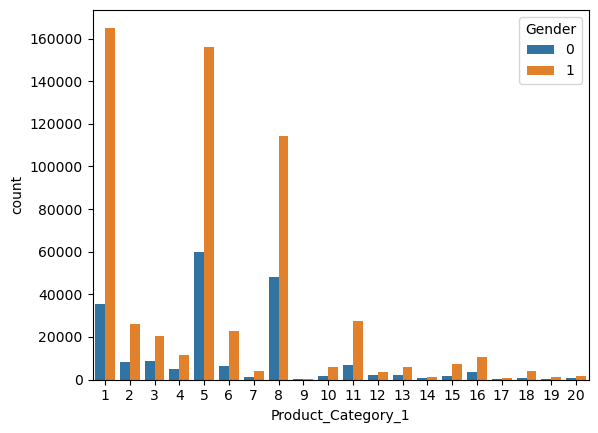

In [183]:
sns.countplot(data =df, x=df['Product_Category_1'],  hue = 'Gender')

- #### From the above graph, we can understand that, whatever may be the occupation, ***males buy goods belonging Product_Category_1*** at a staggering rate, much higher ***than females.*** ####

- #### This analysis points that Product_Category_1 might contain goods for the male audience. ####